# Metody Obliczeniowe w Nauce i Technice
## Laboratorium 9
### Faktoryzacja QR
#### Mateusz Surjak

Rozkład QR – rozkład macierzy ${\displaystyle A}$ do postaci iloczynu dwóch macierzy ${\displaystyle A=QR,}$ gdzie ${\displaystyle Q}$ jest macierzą ortogonalną, czyli ${\displaystyle (Q^{T}Q=I)}$ i ${\displaystyle R}$ jest macierzą trójkątną górną. Rozkłąd QR często stosuje się w realizacji metody najmniejszych kwadratów oraz rozwiązywaniu układów równań liniowych.

## Zadanie 1 Faktoryzacja QR metodą Grama-Schmidta


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

Zaimplementowałem funkcje dokonującą faktoryzacji QR metodą Grama-Schmidta. 

In [2]:
def graham_schmidt_qr(A):
    N = len(A)
    Q = np.zeros((N,N))
    R = np.zeros((N,N))
    #normalizujemy pierwsza columnę i dopisujemy do macierzy Q
    Q[:, 0] = A[:, 0] / np.linalg.norm(A[:, 0])
    
    #Obliczanie Q
    for k in range(1,N):
            
        # wpisujemy k-tą kolumnę macierzy A do macierzy wynikowej
        Q[:, k] = A[:, k]
        
        # obliczamy k-tą kolumnę
        for i in range(k):
            Q[:, k] -= np.dot(Q[:, i], A[:, k]) * Q[:, i]
           
        #normalizujemy k-tą kolumnę macierzy wynikowej Q
        Q[:, k] = Q[:, k] / np.linalg.norm(Q[:, k])
        
    # obliczamy R    
    for i in range(N):
        for j in range(i,N):
            R[i, j] = np.dot(Q[:, i], A[:, j])

    return Q, R

Następnie napisałem funkcje testującą poprawność implementacji powyższej funkcji, dodałem również mierzenie czasu wykonania mojej funkcji a funkcji bibliotecznej.

In [3]:
def test_graham_schmidt():
    sizes = [5,50,100,300,500,1000]
    for N in sizes:
        # generuje losową macierz
        A = np.random.rand(N, N)
        
        start = time.time()
        Q, R = graham_schmidt_qr(A)
        end = time.time()

        start_lib = time.time()
        Q_lib, R_lib = np.linalg.qr(A, mode='complete')
        end_lib = time.time()
        
        print(f"""
        Dla N = {N}
        Własna implementacja: {round((end-start)*1000,2)} ms
        Funkcja biblioteczna: {round((end_lib - start_lib)*1000,2)} ms
        Poprawność implementacji: {np.allclose(Q@R,Q_lib@R_lib)}
        """)

In [4]:
test_graham_schmidt()


        Dla N = 5
        Własna implementacja: 1.0 ms
        Funkcja biblioteczna: 7.0 ms
        Poprawność implementacji: True
        

        Dla N = 50
        Własna implementacja: 8.99 ms
        Funkcja biblioteczna: 2.0 ms
        Poprawność implementacji: True
        

        Dla N = 100
        Własna implementacja: 34.04 ms
        Funkcja biblioteczna: 1.97 ms
        Poprawność implementacji: True
        

        Dla N = 300
        Własna implementacja: 418.03 ms
        Funkcja biblioteczna: 2.97 ms
        Poprawność implementacji: True
        

        Dla N = 500
        Własna implementacja: 1145.0 ms
        Funkcja biblioteczna: 12.0 ms
        Poprawność implementacji: True
        

        Dla N = 1000
        Własna implementacja: 20762.07 ms
        Funkcja biblioteczna: 61.97 ms
        Poprawność implementacji: True
        


Wyniki zwracane przez moją implementacje są zgodne z wynikami bibliotecznymi ale czas wykonania jest o wiele lepszy po stronie funckcji z biblioteki numpy.

Następnie napisałem funkcje generującą 50 macierzy 8x8 o różnych wskaźnikach uwarunkowania i wyliczającą faktoryzacje QR dla tych macierzy oraz sprawdzającą na ile bardzo macierz Q jest zaburzona poprzez błąd reprezentacji.

In [5]:
def generate_matrices_and_calculate_cond():
    conds = []
    vals = []
    i = 0
    while i < 50:
        A = np.random.rand(8, 8)
        U, S, Vt = np.linalg.svd(A)
        cond = S[0] / S[-1]
        if cond not in conds:
            i += 1
            Q, R = graham_schmidt_qr(A)
            val = np.linalg.norm(np.identity(8) - Q.transpose() @ Q)
            conds.append(cond)
            vals.append(val)
    plt.xlabel('Cond')
    plt.ylabel('Error')
    plt.plot(conds, vals, 'o')
    plt.show()

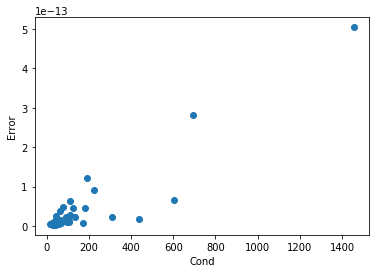

In [6]:
generate_matrices_and_calculate_cond()

Wraz ze wzrostem wskaźnika uwarunkowania macierzy (cond), macierz Q przestaje być ortogonalna i przestaje obowiązywać warunek ortogonalności macierzy $I = Q^{T}Q$. Powodem takiego zjawiska jest to, iż algorytm Grama-Schmidta dla macierzy o dużym wskaźniku uwarunkowania staje się numerycznie niestabilny, błąd reprezentacji numerycznej danych wejsciowych ma coraz większy wpływ na dane wyjściowe, które przestają być całkowicie zgodne z prawdą.

## Zadanie 2 Rozwiązywanie układów równań metodą QR

Napisalem funkcje rozwiązującą układ równań liniowych, funkcja ta korzysta z *back substitution* ponieważ macierz R jest macierzą trójkątną górną.

In [7]:
x = np.array([x for x in range(-5, 6)])
y = np.array([2, 7, 9, 12, 13, 14, 14, 13, 10, 8, 4])

In [9]:
def solve_qr():
    A = np.vander(x,increasing=True)
    # biorę tylko 3 kolumny bo funkcja w zadaniu jest drugiego stopnia
    A = A[:,:3]
    Q, R = np.linalg.qr(A)

    return np.linalg.solve(R, Q.T @ y)

Następnie dla otrzymanych współczynników wygenerowałem wykres funkcji aproksymującej podane punkty.

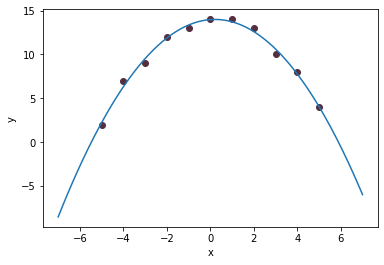

In [10]:
a = solve_qr()
func = lambda x: a[0] + a[1]*x+a[2]*x**2    
x_range = np.linspace(-7, 7, 200)

fig, ax = plt.subplots(1, 1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.scatter(x, y, c="#552F40")
ax.plot(x_range, func(x_range))
plt.show()

### Wnioski

- Metoda QR pozwala w szybki sposób rozwiązać układ równań liniowych ponieważ można zastosować *back substitution*
- Niestety dla macierzy o dużym wskaźniku uwarunkowania algorytm staje się niestabilny numerycznie i zaczyna zwracać niepoprawne dane.